# Example: Asset Replacement

Miranda and Fackler, Applied Computational Economics and Finance, 2002, Section 7.6.2

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from quantecon.markov import DiscreteDP

In [3]:
n = 5  # Number of states
m = 2  # Number of actions; 0: keep, 1: replace
repcost = 75  # Replacement cost
beta = 0.9  # Discount factor

In [4]:
# Reward array
R = np.empty((n, m))
S = np.arange(n) + 1
R[:, 0] = 50 - 2.5 * S - 2.5 * S**2
R[:, 1] = 50 - repcost

# Infeasible action
R[-1, 0] = -np.inf

In [5]:
R

array([[ 45., -25.],
       [ 35., -25.],
       [ 20., -25.],
       [  0., -25.],
       [-inf, -25.]])

In [6]:
# (Degenerate) transition probability array
Q = np.zeros((n, m, n))
for i in range(n):
    Q[i, 0, np.minimum(i+1, n-1)] = 1
    Q[i, 1, 0] = 1

In [7]:
Q

array([[[ 0.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  1.,  0.],
        [ 1.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  1.],
        [ 1.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  1.],
        [ 1.,  0.,  0.,  0.,  0.]]])

In [8]:
# Create a DiscreteDP
ddp = DiscreteDP(R, Q, beta)

In [9]:
# Solve the dynamic optimization problem (by policy iteration)
res = ddp.solve()

In [10]:
# Number of iterations
res.num_iter

1

In [11]:
# Optimal value function
res.v

array([ 216.56004653,  190.62227392,  172.91363769,  169.90404187,
        169.90404187])

In [12]:
# Optimal policy
res.sigma

array([0, 0, 0, 1, 1])

In [13]:
# Transition probability matrix
res.mc.P

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [14]:
# Simulate the controlled Markov chain
initial_state = 0
ts_length = 13
age_path = res.mc.simulate(ts_length=ts_length, init=initial_state) + 1

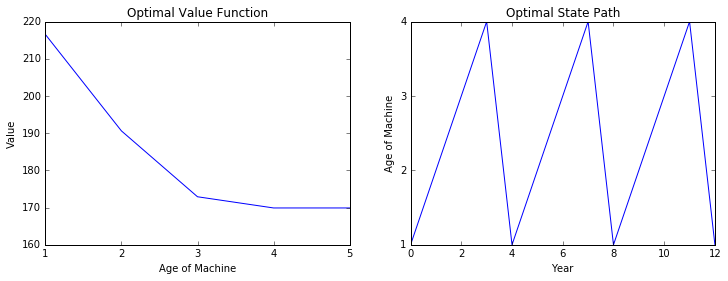

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(np.arange(n)+1, res.v)
ax[0].set_xticks(np.linspace(1, 5, 5, endpoint=True))
ax[0].set_xlabel('Age of Machine')
ax[0].set_ylabel('Value')
ax[0].set_title('Optimal Value Function')

ax[1].plot(age_path)
ax[1].set_yticks(np.linspace(1, 4, 4, endpoint=True))
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Age of Machine')
ax[1].set_title('Optimal State Path')

plt.show()